In [ ]:
# 2023-05
# figuring out the optimal way to (linearly) squash a shape into a rectangle

In [8]:
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt

In [69]:
pts = np.random.randn(50, 2)

In [70]:
hull = sp.spatial.ConvexHull(pts)

In [71]:
hull.vertices

array([16, 22,  8, 47, 33, 11, 25], dtype=int32)

In [72]:
hull.volume

10.757780795318077

In [73]:
v = len(hull.vertices)
slopes = []

for i in range(v):
    before = pts[hull.vertices[i]]
    after = pts[hull.vertices[(i+1) % v]]
    
    slopes.append((after[1] - before[1]) / (after[0] - before[0]))

In [75]:
slopes

[2.1293420340799547,
 -1.681486682936341,
 -0.5262095065925277,
 0.15704112668689355,
 1.8906588994761524,
 -4.384743003043681,
 -0.08706749495181593]

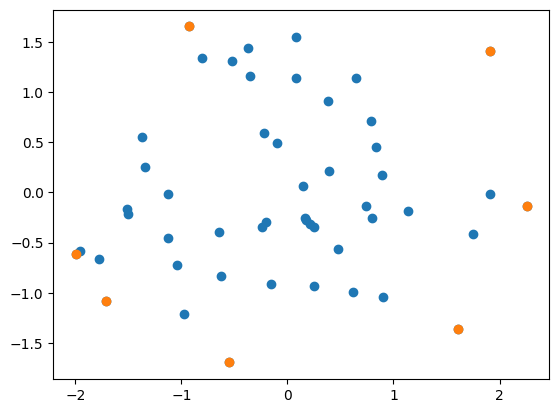

In [74]:
plt.scatter(pts[:,0], pts[:,1])
plt.scatter(pts[hull.vertices,0], pts[hull.vertices,1])

In [76]:
best = 0.
winners = []

for i in range(v):
    for j in range(i+1, v):
        inv = np.array([[1, 1], [slopes[i], slopes[j]]])
        newpts = pts[hull.vertices] @ np.linalg.inv(inv).T
        
        out_area = (np.max(newpts[:, 0]) - np.min(newpts[:, 0])) \
                 * (np.max(newpts[:, 1]) - np.min(newpts[:, 1]))
        in_area = hull.volume / np.abs(np.linalg.det(inv))
        
        score = in_area / out_area
        
        if np.abs(score - best) < 1e-3:
            winners.append((i, j))
        elif score > best:
            best = score
            winners = [(i, j)]
            
#         plt.scatter(newpts[:,0], newpts[:,1])
#         plt.show()
        
#         print(i, j, score)

In [77]:
best

0.8381240648782463

In [78]:
winners

[(0, 6)]

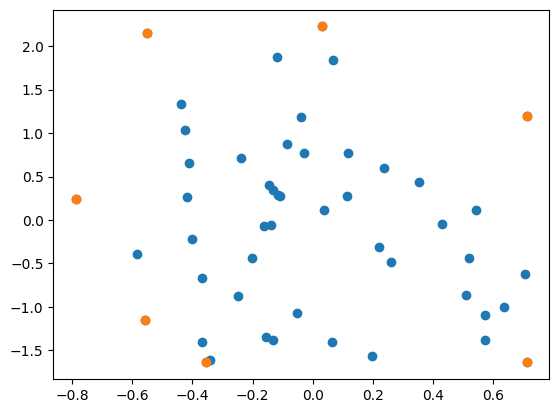

In [79]:
i, j = winners[0]
inv = np.array([[1, 1], [slopes[i], slopes[j]]])
newpts = pts @ np.linalg.inv(inv).T
newvts = newpts[hull.vertices]

plt.scatter(newpts[:, 0], newpts[:, 1])
plt.scatter(newvts[:, 0], newvts[:, 1])
plt.show()

In [67]:
hull.volume / ((np.max(pts[:, 0]) - np.min(pts[:, 0])) \
                 * (np.max(pts[:, 1]) - np.min(pts[:, 1])))

0.7959611922246953

In [68]:
slopes[i], slopes[j]

(-32.42389088020488, 0.1020427789414058)

In [115]:
nlists = [list(s) for s in nsets]

In [116]:
pts = np.array([[z, n] for z in range(119) for n in nlists[z]])

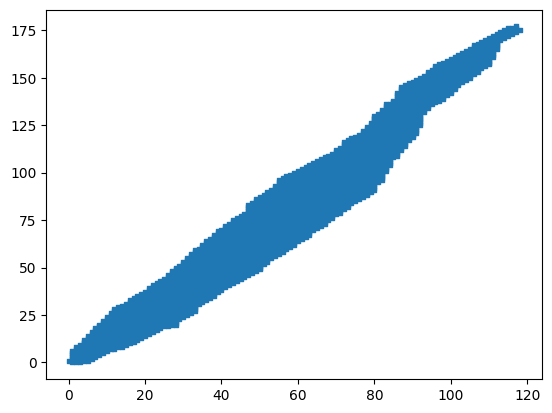

In [130]:
plt.scatter(pts[:,0], pts[:, 1], s=5, marker='s')

In [132]:
hull = sp.spatial.ConvexHull(pts)

In [133]:
hull.vertices

array([3183, 3180, 3170, 3077, 2900, 2656, 1509,  179,    7,    0,    1,
         17,   39,  202,  554, 1281, 1781, 2316, 2393, 3136], dtype=int32)

In [134]:
hull.volume

3614.0

In [135]:
v = len(hull.vertices)
slopes = []

for i in range(v):
    before = pts[hull.vertices[i]]
    after = pts[hull.vertices[(i+1) % v]]
    
    slopes.append((after[1] - before[1]) / (after[0] - before[0]))

In [136]:
slopes

[-2.0,
 0.5,
 1.0,
 1.1,
 1.2222222222222223,
 1.53125,
 1.5813953488372092,
 2.0,
 5.0,
 -1.0,
 0.0,
 0.5,
 0.7777777777777778,
 0.8571428571428571,
 1.3181818181818181,
 1.3846153846153846,
 1.4,
 1.5,
 2.2,
 2.25]

In [143]:
slopes = list(set(slopes))

In [144]:
slopes

[0.5,
 1.0,
 1.1,
 1.2222222222222223,
 1.53125,
 1.5813953488372092,
 2.0,
 5.0,
 0.0,
 0.7777777777777778,
 1.3181818181818181,
 1.5,
 2.25,
 2.2,
 0.8571428571428571,
 1.3846153846153846,
 1.4,
 -2.0,
 -1.0]

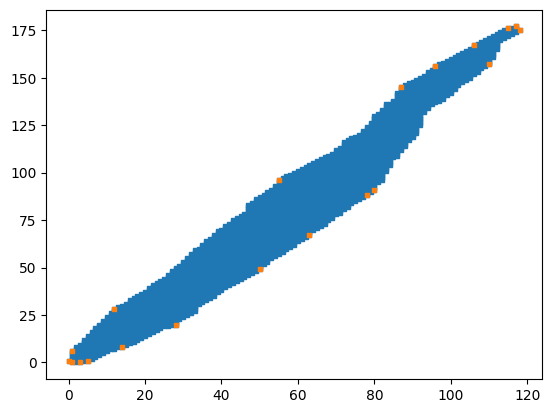

In [145]:
plt.scatter(pts[:,0], pts[:,1], s=5, marker='s')
plt.scatter(pts[hull.vertices,0], pts[hull.vertices,1], s=5, marker='s')

In [141]:
v

20

In [147]:
best = 0.
winners = []

for i in range(len(slopes)):
    for j in range(i+1, len(slopes)):
        inv = np.array([[1, 1], [slopes[i], slopes[j]]])
        newpts = pts[hull.vertices] @ np.linalg.inv(inv).T
        
        out_area = (np.max(newpts[:, 0]) - np.min(newpts[:, 0])) \
                 * (np.max(newpts[:, 1]) - np.min(newpts[:, 1]))
        in_area = hull.volume / np.abs(np.linalg.det(inv))
        
        score = in_area / out_area
        
        if np.abs(score - best) < 1e-3:
            winners.append((i, j))
        elif score > best:
            best = score
            winners = [(i, j)]
            
#         plt.scatter(newpts[:,0], newpts[:,1])
#         plt.show()
        
#         print(i, j, score)

In [148]:
best

0.7599086092830074

In [149]:
winners

[(10, 13)]

0.7599086092830074


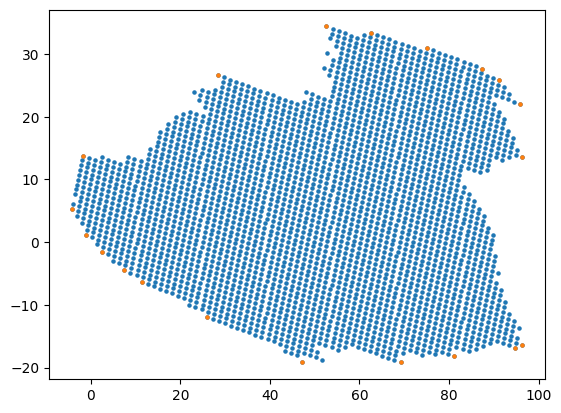

In [166]:
i, j = winners[0]
inv = np.array([[1, 1], [slopes[i], slopes[j]]])
newpts = pts @ np.linalg.inv(inv).T
newvts = newpts[hull.vertices]
out_area = (np.max(newpts[:, 0]) - np.min(newpts[:, 0])) \
         * (np.max(newpts[:, 1]) - np.min(newpts[:, 1]))
in_area = hull.volume / np.abs(np.linalg.det(inv))

score = in_area / out_area
print(score)
plt.scatter(newpts[:, 0], newpts[:, 1], s=5)
plt.scatter(newvts[:, 0], newvts[:, 1], s=5)
plt.show()

0.7174905697836014


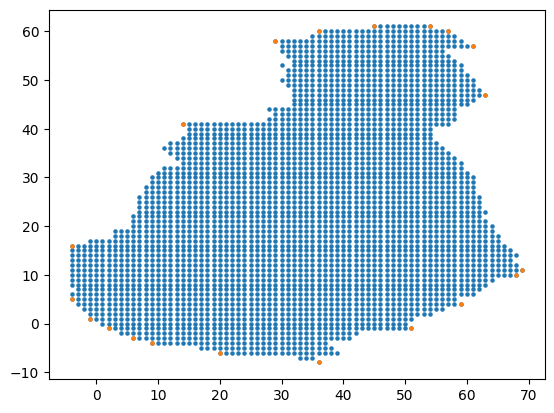

In [174]:
inv = np.array([[1, 1], [1., 2]])
newpts = pts @ np.linalg.inv(inv).T
newvts = newpts[hull.vertices]

out_area = (np.max(newpts[:, 0]) - np.min(newpts[:, 0])) \
         * (np.max(newpts[:, 1]) - np.min(newpts[:, 1]))
in_area = hull.volume / np.abs(np.linalg.det(inv))

score = in_area / out_area
print(score)

plt.scatter(newpts[:, 0], newpts[:, 1], s=5)
plt.scatter(newvts[:, 0], newvts[:, 1], s=5)
plt.show()

In [176]:
np.linalg.inv(inv).T

array([[ 2., -1.],
       [-1.,  1.]])

In [175]:
(np.max(newpts[:, 0]), np.min(newpts[:, 0]), np.max(newpts[:, 1]), np.min(newpts[:, 1]))


(69.0, -4.0, 61.0, -8.0)

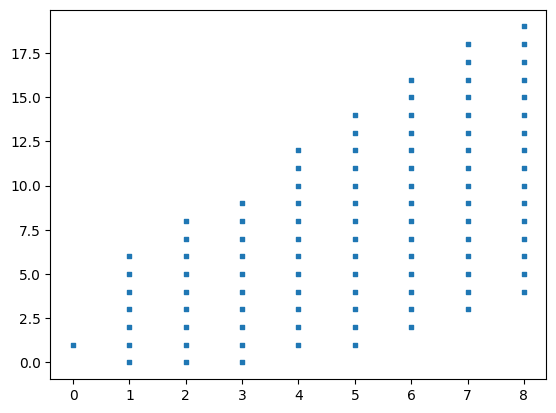

In [158]:
plt.scatter(pts[:100,0], pts[:100,1], s=5, marker='s')


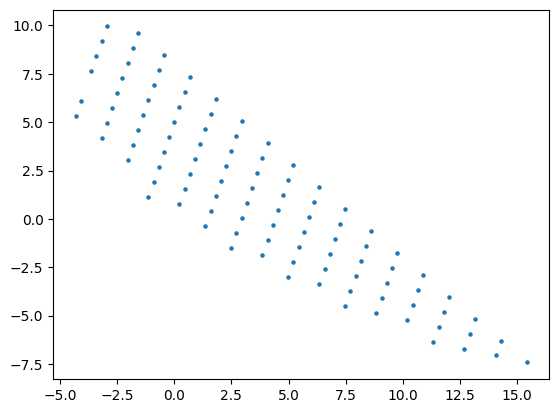

In [159]:
plt.scatter(newpts[:100, 0], newpts[:100, 1], s=5)

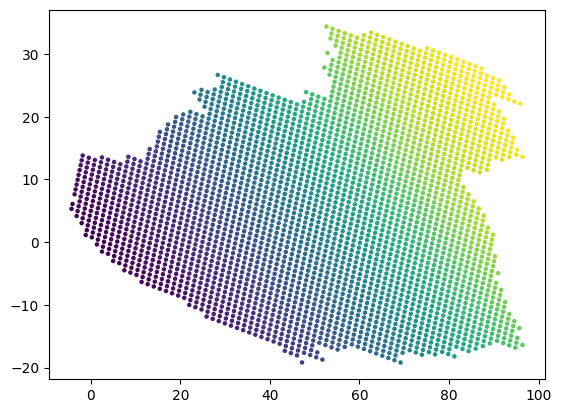

In [156]:
plt.scatter(newpts[:, 0], newpts[:, 1], c=np.linspace(0,1,len(newpts)), s=5)

In [150]:
hull.volume / ((np.max(pts[:, 0]) - np.min(pts[:, 0])) \
                 * (np.max(pts[:, 1]) - np.min(pts[:, 1])))

0.17303456861055252

In [152]:
slopes[i], slopes[j]

(1.3181818181818181, 2.2)

In [ ]:
# from Mathematica:

In [114]:
nsets = [{1}, {0, 1, 2, 3, 4, 5, 6}, {0, 1, 2, 3, 4, 5, 6, 7, 8}, {0, 1, 2, 3, 4, 5,
   6, 7, 8, 9}, {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}, {1, 2, 3, 4, 
  5, 6, 7, 8, 9, 10, 11, 12, 13, 14}, {2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
   12, 13, 14, 15, 16}, {3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 
  16, 17, 18}, {4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 
  19, 20}, {5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
   21, 22}, {6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 
  21, 22, 23, 24}, {7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 
  20, 21, 22, 23, 24, 25, 26}, {7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 
  17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28}, {8, 9, 10, 11, 12, 
  13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 
  29}, {8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 
  24, 25, 26, 27, 28, 29, 30}, {9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
   19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31}, {10, 11, 12, 
  13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 
  30, 31, 32, 33}, {11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 
  23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34}, {12, 13, 14, 15, 
  16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 
  33, 34, 35}, {13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 
  26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36}, {14, 15, 16, 17, 18, 
  19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 
  36, 37}, {15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 
  29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39}, {16, 17, 18, 19, 20, 
  21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 
  38, 39, 40, 41}, {17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 
  29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42}, {18, 19, 
  20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 
  37, 38, 39, 40, 41, 42, 43}, {19, 20, 21, 22, 23, 24, 25, 26, 27, 
  28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 
  44}, {19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 
  34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46}, {20, 21, 22, 
  23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 
  40, 41, 42, 43, 44, 45, 46, 47, 48}, {20, 21, 22, 23, 24, 25, 26, 
  27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 
  44, 45, 46, 47, 48, 49, 50}, {23, 24, 25, 26, 27, 28, 29, 30, 31, 
  32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 
  49, 50, 51}, {24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 
  37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 
  53}, {25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 
  40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 
  55}, {26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 
  41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 
  57}, {27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 
  42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 
  59}, {31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 
  46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60}, {32, 
  33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 
  50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62}, {33, 34, 35, 
  36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 
  53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64}, {34, 35, 36, 37, 
  38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 
  55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65}, {35, 36, 37, 38, 39, 
  40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 
  57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67}, {37, 38, 39, 40, 41, 
  42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 
  59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69}, {38, 39, 40, 41, 42, 
  43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 
  60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70}, {40, 41, 42, 43, 44, 
  45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 
  62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72}, {41, 42, 43, 44, 45, 
  46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 
  63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73}, {42, 43, 44, 45, 46, 
  47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 
  64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75}, {43, 44, 45, 46, 
  47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 
  64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76}, {44, 45, 46, 
  47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 
  64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77}, {45, 46, 
  47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 
  64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78}, {46, 
  47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 
  64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 
  81, 82, 83}, {47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 
  60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 
  77, 78, 79, 80, 81, 82, 83, 84}, {48, 49, 50, 51, 52, 53, 54, 55, 
  56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 
  73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86}, {49, 50, 
  51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 
  68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 
  85, 86, 87}, {52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 
  65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 
  82, 83, 84, 85, 86, 87, 88}, {53, 54, 55, 56, 57, 58, 59, 60, 61, 
  62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 
  79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90}, {55, 56, 57, 58, 
  59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 
  76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 
  91}, {56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 
  71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 
  88, 89, 90, 91, 92, 93}, {57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 
  67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 
  84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96}, {58, 59, 60, 
  61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 
  78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 
  95, 96, 97}, {60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 
  73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 
  90, 91, 92, 93, 94, 95, 96, 97, 98}, {61, 62, 63, 64, 65, 66, 67, 
  68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 
  85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99}, {62, 
  63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 
  80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 
  97, 98, 99, 100}, {64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 
  76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 
  93, 94, 95, 96, 97, 98, 99, 100, 101}, {65, 66, 67, 68, 69, 70, 71, 
  72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 
  89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102}, {66, 67,
   68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
   85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 
  101, 102, 103}, {67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79,
   80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96,
   97, 98, 99, 100, 101, 102, 103, 104}, {70, 71, 72, 73, 74, 75, 76, 
  77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 
  94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105}, {71, 72, 73, 
  74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 
  91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 
  106}, {72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 
  87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 
  103, 104, 105, 106, 107}, {73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 
  83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 
  100, 101, 102, 103, 104, 105, 106, 107, 108}, {75, 76, 77, 78, 79, 
  80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 
  97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109}, {76, 
  77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 
  94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108,
   109, 110}, {78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91,
   92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 
  107, 108, 109, 110, 111, 112}, {79, 80, 81, 82, 83, 84, 85, 86, 87, 
  88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 
  104, 105, 106, 107, 108, 109, 110, 111, 112, 113}, {81, 82, 83, 84, 
  85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 
  101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 
  114, 115, 116}, {82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94,
   95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 
  109, 110, 111, 112, 113, 114, 115, 116, 117}, {84, 85, 86, 87, 88, 
  89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104,
   105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 
  118}, {85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 
  100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 
  113, 114, 115, 116, 117, 118, 119}, {86, 87, 88, 89, 90, 91, 92, 93,
   94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 
  108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 
  120}, {87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101,
   102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 
  115, 116, 117, 118, 119, 120, 121, 122}, {88, 89, 90, 91, 92, 93, 
  94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108,
   109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 
  122, 123, 124}, {90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 
  102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 
  115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126}, {91, 
  92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 
  107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 
  120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130}, {95, 96, 97,
   98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,
   112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 
  125, 126, 127, 128, 129, 130, 131}, {96, 97, 98, 99, 100, 101, 102, 
  103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 
  116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 
  129, 130, 131, 132, 133}, {101, 102, 103, 104, 105, 106, 107, 108, 
  109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 
  122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 
  135, 136}, {104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 
  115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 
  128, 129, 130, 131, 132, 133, 134, 135, 136}, {108, 109, 110, 111, 
  112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 
  125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 
  138}, {109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 
  121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 
  134, 135, 136, 137, 138, 139, 140, 141, 142}, {112, 113, 114, 115, 
  116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 
  129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 
  142, 143, 144, 145}, {114, 115, 116, 117, 118, 119, 120, 121, 122, 
  123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 
  136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146}, {117, 118, 
  119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 
  132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 
  145, 146, 147}, {119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 
  129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 
  142, 143, 144, 145, 146, 147, 148}, {121, 122, 123, 124, 125, 126, 
  127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 
  140, 141, 142, 143, 144, 145, 146, 147, 148, 149}, {125, 126, 127, 
  128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 
  141, 142, 143, 144, 145, 146, 147, 148, 149, 150}, {132, 133, 134, 
  135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 
  148, 149, 150, 151}, {134, 135, 136, 137, 138, 139, 140, 141, 142, 
  143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153}, {136, 137, 
  138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 
  151, 152, 153, 154}, {137, 138, 139, 140, 141, 142, 143, 144, 145, 
  146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156}, {138, 139, 
  140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 
  153, 154, 155, 156, 157}, {139, 140, 141, 142, 143, 144, 145, 146, 
  147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158}, {141, 
  142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 
  155, 156, 157, 158, 159}, {142, 143, 144, 145, 146, 147, 148, 149, 
  150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160}, {144, 145, 
  146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 
  159, 160, 161}, {146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 
  156, 157, 158, 159, 160, 161, 162}, {148, 149, 150, 151, 152, 153, 
  154, 155, 156, 157, 158, 159, 160, 161, 162, 163}, {149, 150, 151, 
  152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 
  164}, {150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 
  162, 163, 164, 165}, {152, 153, 154, 155, 156, 157, 158, 159, 160, 
  161, 162, 163, 164, 165, 166, 167}, {153, 154, 155, 156, 157, 158, 
  159, 160, 161, 162, 163, 164, 165, 166, 167, 168}, {155, 156, 157, 
  158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169}, {156, 
  157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 
  170}, {157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 
  169, 170, 171}, {161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 
  171, 172}, {165, 166, 167, 168, 169, 170, 171, 172, 173}, {170, 171,
   172, 173, 174}, {171, 172, 173, 174, 175}, {172, 173, 174, 175, 
  176}, {173, 174, 175, 176}, {174, 175, 176, 177}, {175}]